In [122]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [123]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Explorational data analysis

In [124]:
print(tX.shape)
print(y.shape)
print(ids.shape)

(250000, 30)
(250000,)
(250000,)


#### Number of unique values, mean, histogram of values

In [145]:
with open("../data/train.csv") as fileobj:
    #print("Feature names: \n\n")
    names = fileobj.readline().rstrip("\n")
    feature_names = names.split(sep=",")[2:] # remove ID and prediction
    #for easier access to variables make index dict
    f_in = {x:v for v,x in enumerate(feature_names)}
    

In [150]:
percentages = []


for feature_name, index in f_in.items():
    f_vals = tX[:,index]
    num_unique = len(np.unique(f_vals))
    print("{} has {} unique values\n".format(feature_name,num_unique))
    
    if feature_name not in ["PRI_jet_all_pt","DER_lep_eta_centrality", ]:
        f_vals_filtered = np.copy(f_vals)
        f_vals_filtered[f_vals_filtered == -999.] = np.NaN
    else:
        f_vals_filtered = np.copy(f_vals)
        f_vals_filtered[f_vals_filtered == -999.] = np.NaN
        f_vals_filtered[f_vals_filtered == 0] = np.NaN
        print("0 marks no entry too\n")
    
    percentage = np.count_nonzero(~np.isnan(f_vals_filtered))/len(f_vals_filtered)
    percentages.append(percentage)
    
    print("% of samples have entry: {:.1f}".format(percentage*100))
    print("mean without -999. (or 0): {}".format(np.nanmean(f_vals_filtered)))
    print("standarddeviation without -999. (or 0): {}".format(np.nanstd(f_vals_filtered)))
    print("std/mean: {}".format(np.nanstd(f_vals_filtered)/np.nanmean(f_vals_filtered)))
    print("--------------------------------\n")

DER_mass_MMC has 108338 unique values

% of samples have entry: 84.8
mean without -999. (or 0): 121.8585283595896
standarddeviation without -999. (or 0): 57.298021449827395
std/mean: 0.4702011604862644
--------------------------------

DER_mass_transverse_met_lep has 101637 unique values

% of samples have entry: 100.0
mean without -999. (or 0): 49.239819276
standarddeviation without -999. (or 0): 35.34481492202995
std/mean: 0.7178095988515819
--------------------------------

DER_mass_vis has 100558 unique values

% of samples have entry: 100.0
mean without -999. (or 0): 81.181981612
standarddeviation without -999. (or 0): 40.8286088749526
std/mean: 0.5029269803992746
--------------------------------

DER_pt_h has 115563 unique values

% of samples have entry: 100.0
mean without -999. (or 0): 57.895961656
standarddeviation without -999. (or 0): 63.65555430684573
std/mean: 1.0994817684360692
--------------------------------

DER_deltaeta_jet_jet has 7087 unique values

% of samples hav

(array([ 7.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  1., 18.]),
 array([0.227164 , 0.3044476, 0.3817312, 0.4590148, 0.5362984, 0.613582 ,
        0.6908656, 0.7681492, 0.8454328, 0.9227164, 1.       ]),
 <BarContainer object of 10 artists>)

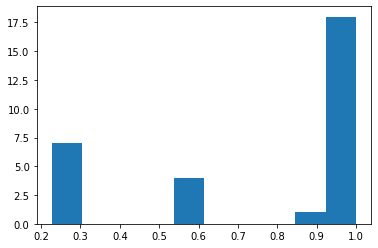

In [151]:
plt.hist(percentages)

In [128]:
feature_names

['DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'DER_lep_eta_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi',
 'PRI_jet_all_pt']

(array([ 2080.,  5799.,  8354.,  9731., 10410., 10456.,  9754.,  8319.,
         5728.,  1912.]),
 array([-257.83100781, -206.26480625, -154.69860469, -103.13240312,
         -51.56620156,    0.        ,   51.56620156,  103.13240312,
         154.69860469,  206.26480625,  257.83100781]),
 <BarContainer object of 10 artists>)

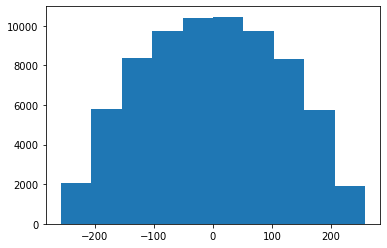

In [144]:
feature_vals = np.copy(tX[:,f_in["PRI_jet_subleading_eta"]])
feature_vals[feature_vals == -999.] = np.NaN

#feature_vals[feature_vals > 0] = np.NaN
plt.hist(np.rad2deg(feature_vals))
#feature_vals

#### Correlation of features

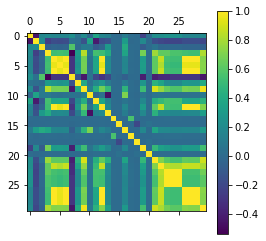

In [22]:
corr_mat = np.corrcoef(tX,rowvar=False)
plt.matshow(corr_mat)
plt.colorbar()
plt.show()

Some variables appear to be more correlated with each other than others

#### Normalize data

In [16]:
def standardize(tx):
    """
    Standardizes the data by substracting mean and dividing by standard deviation
    """
    tx -= np.mean(tx,axis=0)
    tx /= np.std(tx,axis=0)
    
    return tx

In [17]:
tX_standardized = standardize(tX)

#### Do principal component analysis

In [26]:
cov_mat = np.cov(tX_standardized.T) #calculate covariance matrix
eigval_pca, eigvec_pca = np.linalg.eig(cov_mat) #can not be orderd, but they are here

In [147]:
np.sum(percentages)

1.0

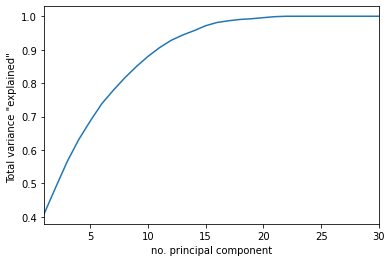

In [40]:
total_eigval = np.sum(eigval_pca)
percentages = [eigval/total_eigval for eigval in eigval_pca]
percentages_cumulative = np.cumsum(percentages)
plt.plot(np.arange(1,len(eigval_pca)+1),percentages_cumulative)
plt.xlim(1,len(eigval_pca))
plt.ylabel("Total variance \"explained\" ")
plt.xlabel("no. principal component")
plt.show()

Arbitrarily choose cutoff when more than 0.95% of the cumulative variance is explained

In [54]:
greater_095 = np.argmax(percentages_cumulative > 0.95) #stops at first true
print("{} principal components can explain more than 95% of the variance".format(greater_095+1))

14 principal components can explain more than 95% of the variance


#### Project onto principal components

  v : (..., M, M) array 
  The normalized (unit "length") eigenvectors, 
  such that the 
        column ``v[:,i]`` is the eigenvector corresponding to the 
        eigenvalue ``w[i]``.

In [ ]:
pcas_095 = eigvec_pca[:,:greater_095]
pcas_095_other = (eigvec_pca.T[:][:greater_095]).T
np.allclose(pcas_095_other, pcas_095)

True

In [47]:
pcas_095.shape

(30, 13)

In [52]:
projection_mat = eigvec_pca[:,:greater_095]
projected_data = tX_standardized @  projection_mat

In [53]:
projected_data.shape

(250000, 13)

### Ideas for feature engineering

Missing values\
binary features -1 (negatives), 0 (not there), 1 (positives)\
numericals: replace by some value\


## Generate predictions and save ouput in csv format for submission:

In [10]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [31]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

nan